In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
ph = pd.read_csv('ph2402.csv')
color = pd.read_csv('color.csv')
ph = ph.rename(columns = {'pH затора': 'PH of congestion',
                          'Орто фосфорная кислота/молочная, кг': 'Phosphoric acid, kg',
                          'Количество первого сусла, гл': 'First soul volume, gl',
                          'Кол-во холодного сусла, гл': 'Cooled wort volume, gl',
                          'Сульфат цинка, литр': 'Zinc sulfate volume, l'})






color = color.rename(columns = {'цветность сусла': 'wort color',
                                'Экстрактивность, % с.в.': 'Extractivity, %',
                                'Alpha Acid B Extr: CO2, кг': 'Alpha Acid B Extr: CO2, kg',
                                'Количество слабого сусла, гл': 'Weaker wort volume, gl' ,
                                'солод светлый итого, кг': 'Malt Light total, kg',
                                'жженый 900 ЕВС, кг':'Malt burned 900 ЕВС, kg',
                                '5. Время кипячения/процесса time': 'Brewing time',
                                'Расход пара кипячение, кг/гл': 'Steam consumption boiling, kg/gl',
                                'Пазуа - перекачка time': 'Pumping pause'})

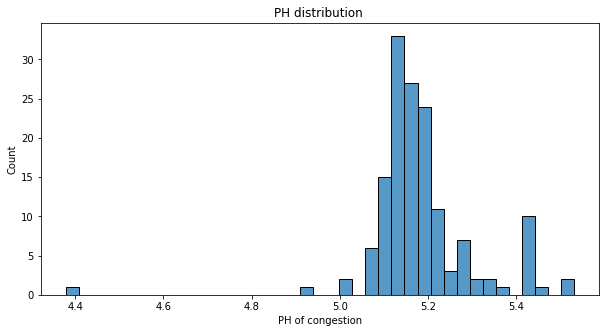

In [3]:
plt.figure(figsize = (10, 5))
plt.title('PH distribution ')
sns.histplot(ph['PH of congestion'])

In [4]:
def ph_norm(x):
    if 5.1 <= x <= 5.2:
        return 'normal'
    elif x < 5.1:
        return 'below normal'
    elif x > 5.2:
        return 'above normal'
    
def norma_color(x):
    if 10.5 <= x <= 13.0:
        return 'norm'
    elif x < 10.5:
        return 'below normal'
    elif x > 13.0:
        return 'above normal'
    
ph['Ph norm'] = ph['PH of congestion'].map(lambda x: ph_norm(x))
color['color norm'] = color['wort color'].map(lambda x: norma_color(x))

In [5]:
columns1 = ['Phosphoric acid, kg',
        'First soul volume, gl',
        'Cooled wort volume, gl',
        'Zinc sulfate volume, l', 'Ph norm']

columns2 = ['Extractivity, %',
'Alpha Acid B Extr: CO2, kg',
'Weaker wort volume, gl' ,
'Malt Light total, kg', 'wort color']

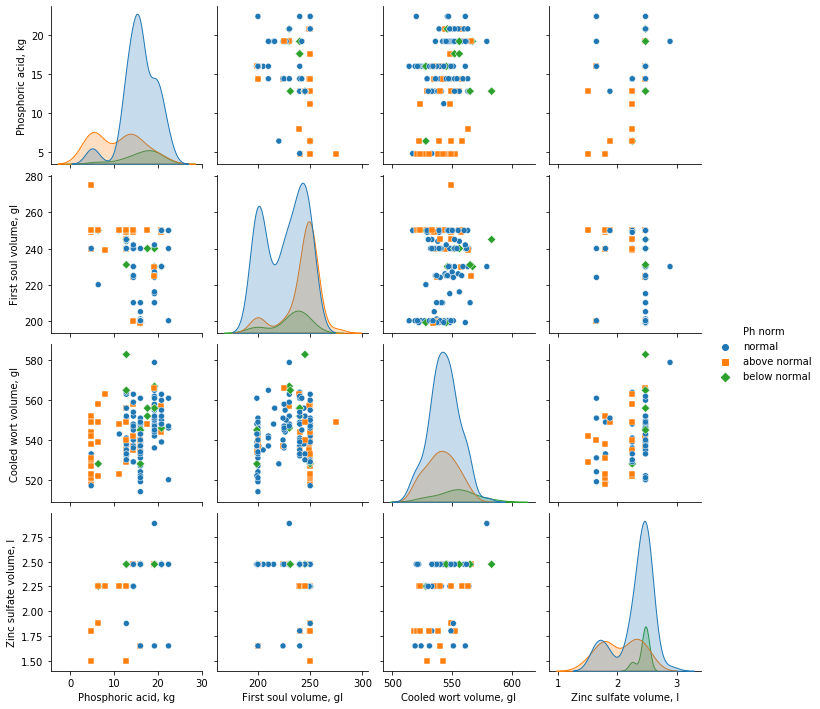

In [6]:
sns.pairplot(ph[columns1], hue="Ph norm", diag_kind = 'kde', markers=["o", "s", "D"])

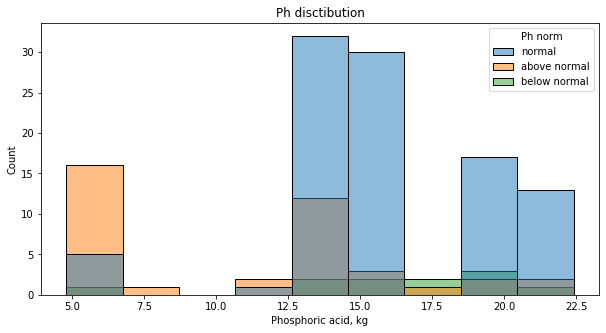

In [7]:
plt.figure(figsize = (10, 5))
plt.title('Ph disctibution')
sns.histplot(
    ph,
    x="Phosphoric acid, kg", hue="Ph norm",
    element = "bars")

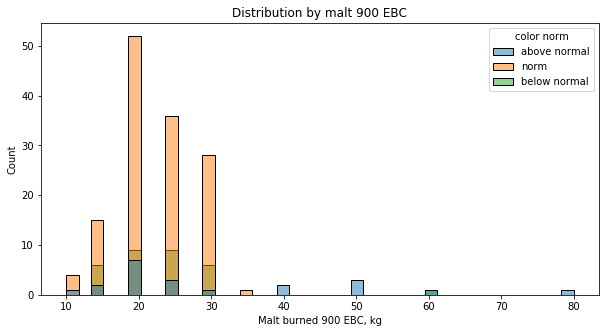

In [8]:
plt.figure(figsize = (10, 5))
plt.title('Distribution by malt 900 EBC')
sns.histplot(
    color,
    x='Malt burned 900 ЕВС, kg', hue="color norm",
    element = "bars")

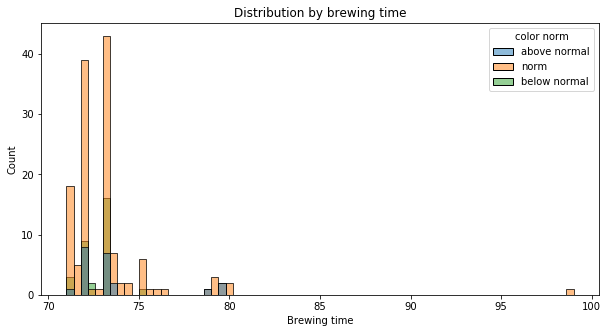

In [9]:
plt.figure(figsize = (10, 5))
plt.title('Distribution by brewing time')
sns.histplot(
    color,
    x='Brewing time', hue="color norm",
    element = "bars")

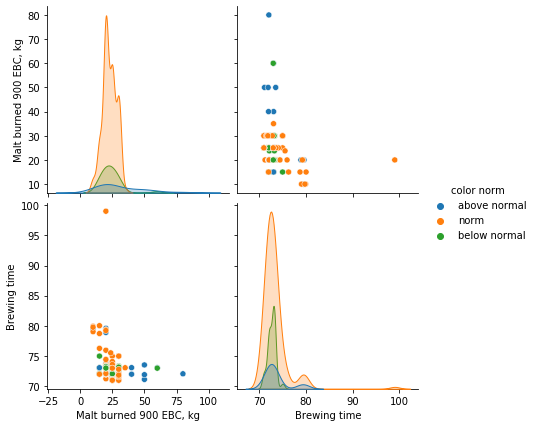

In [10]:
sns.pairplot(color[['Malt burned 900 ЕВС, kg', 'Brewing time', 'color norm']], hue="color norm", diag_kind = 'kde', size = 3)

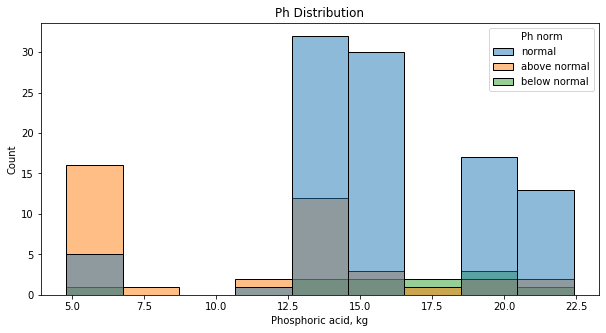

In [98]:
plt.figure(figsize = (10, 5))
plt.title('Ph Distribution')
sns.histplot(
    ph,
    x="Phosphoric acid, kg", hue="Ph norm",
    element = "bars",
    color = ['r', 'w', 'b'])

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0, max_depth=2)

In [99]:
cross_val_score(clf, color.drop(['wort color', 'color norm'], axis = 1), color['color norm'], cv=10).mean()

0.6444444444444445

In [100]:
clf.fit(color.drop(['wort color', 'color norm'], axis = 1), color['color norm'])
clf.score(color.drop(['wort color', 'color norm'], axis = 1), color['color norm'])

0.7712765957446809

In [101]:
df = pd.DataFrame()
df['feature_name'] = color.drop(['wort color', 'color norm'], axis = 1).columns
df['feature_importances_'] = clf.feature_importances_
df.sort_values('feature_importances_', ascending = False).head()

,feature_name,feature_importances_
34,"Malt burned 900 ЕВС, kg",0.591665
37,"Steam consumption boiling, kg/gl",0.296446
67,Pumping pause,0.111888
3,4. Контроль температуры под вальцами,0.000000
36,"Расход пара, нагрев кг/гл",0.000000


In [102]:
clf.get_n_leaves()

4

In [103]:
from sklearn import tree
feature_names = list(color.drop(['wort color', 'color norm'], axis = 1).columns)
text_representation = tree.export_text(clf, feature_names=feature_names)
print(text_representation)

|--- Malt burned 900 ЕВС, kg <= 37.50
|   |--- Steam consumption boiling, kg/gl <= 2675.00
|   |   |--- class: below normal
|   |--- Steam consumption boiling, kg/gl >  2675.00
|   |   |--- class: norm
|--- Malt burned 900 ЕВС, kg >  37.50
|   |--- Pumping pause <= 9.11
|   |   |--- class: below normal
|   |--- Pumping pause >  9.11
|   |   |--- class: above normal



In [20]:
color.groupby('color norm')['nProtokolNo'].count()

color norm
above normal     21
below normal     31
norm            136
Name: nProtokolNo, dtype: int64

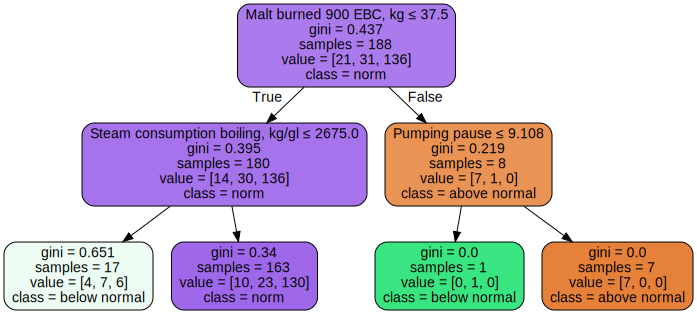

In [21]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_names,  
                     class_names=['above normal', 'below normal', 'norm'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

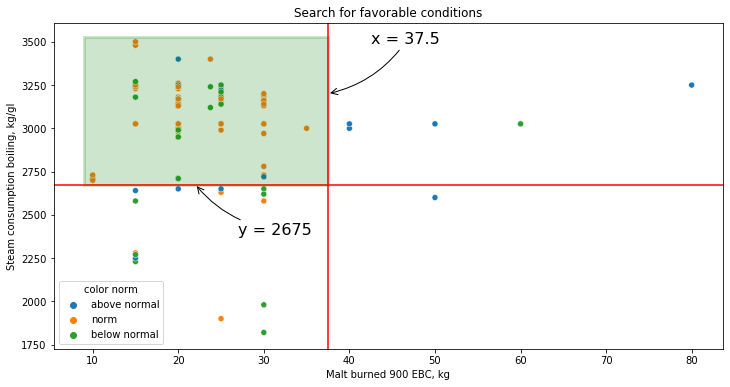

In [22]:
import matplotlib.patches as patches

fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1,1,1,)

#ax.title = 'Показания параметров'
rect = patches.Rectangle((9, 2675), 28.5, 850, linewidth=3, edgecolor='g', facecolor='green', alpha = 0.2)

ax.set_title('Search for favorable conditions')
#plt.hlines(13, 0, 190, colors='k')
#plt.hlines(10.5, 0, 22, colors='r')
ax.axvline(37.5, color='r')
ax.axhline(2675, color='r')
#plt.axhline(1.2, color='r')
ax.add_patch(rect)

ax.annotate('x = 37.5 ',
             xy = (37.5, 3200), 
             xytext = (37.5 + 5,  50), 
             textcoords = 'offset points', 
             fontsize = 16,
             arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=-.2")
           )


ax.annotate('y = 2675 ',
             xy = (22, 2675), 
             xytext = (37.5 + 5,  - 50), 
             textcoords = 'offset points', 
             fontsize = 16,
             arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=-.2")
           )


sns.scatterplot(color['Malt burned 900 ЕВС, kg'], color['Steam consumption boiling, kg/gl'], hue = color['color norm'], ax = ax)

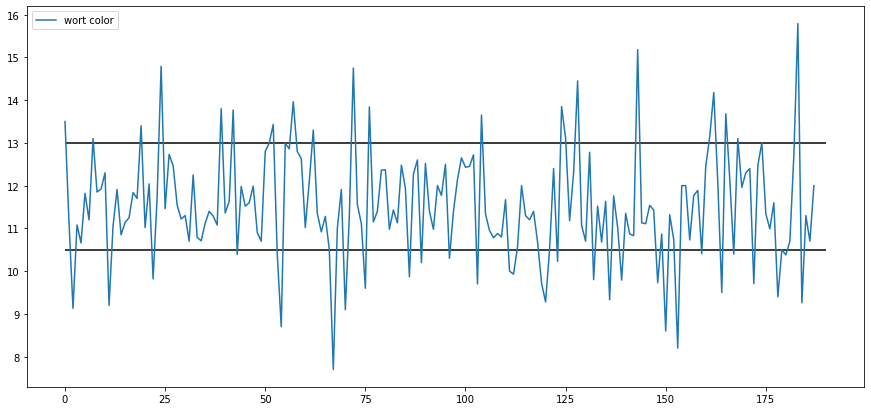

In [23]:
color[['wort color']].plot(figsize = (15 , 7))
plt.hlines(13, 0, 190, colors='k')
plt.hlines(10.5, 0, 190, colors='k')